I. Short introduction in programming with Python

Python is a general purpose programming language that supports rapid development of data analytics applications. The word “Python” is used to refer to both, the programming language and the tool that executes the scripts written in Python language.

Its main advantages are:

Free
Open-source
Available on all major platforms (macOS, Linux, Windows)
Supported by Python Software Foundation
Supports multiple programming paradigms
Has large community
Rich ecosystem of third-party packages


II. Starting with data

For this tutorial, we will be using the SCADA data, a subset of the data from a wind turbine in Kelmarsh Wind Farm in Northamptonshire (England), United-Kingdom. We will use the wind speed and wind power data caught in sites. The dataset is stored as a .csv file: each row holds information for a single data feature (in column) from 1/1/2022 to 31/5/2022.

We will be using files from the Github repository https://github.com/HoaXNguyen/RRTutorials/tree/main. This section will use the .csv files in two folders: https://github.com/HoaXNguyen/RRTutorials/tree/main/data/Kelmarsh_SCADA_2022 and https://github.com/HoaXNguyen/RRTutorials/tree/main/data/Kelmarsh_SCADA_2022_clean.

In [1]:
# Import required packages

import pandas as pd
import matplotlib as plt
import os

In [2]:
# Check where is this code

print(os.getcwd()) # /Users/mac/Downloads/RRTutorials/code


/Users/mac/Downloads/RRTutorials/code


III. Data organisation

Data format is crucial when one starts working with the data. Saving the data in the right format not only helps subsequent tasks easier but also helps other to reproduce your code. Good data organization is the foundation of your research project. 

If data is save in a poor format, which other can not read, load, and understand, you definitely need to save it with better format.

Next cell shows an example of a poor saving format which leads to the problem for the others to know the features of the data. Examples show the data header has mixed format, space, "", etc.. making pandas cannot load all cells correctly. This is due to poor data file format which can be improved to make dataset readable and reproducible.

Good practice for data organisation:
- Create a new file with your cleaned or analyzed data. Don’t modify the original dataset, or you will never know where you started! There are two folders to save data in data folder.
- Keep track of the steps you took in your clean up or analysis. You should track these steps as you would any step in an experiment. We recommend that you do this in a plain text file stored in the same folder as the data file. The history of data is save in .txt file.
- Structure data in the file. (a) Put all your variables in columns - the thing you’re measuring, like ‘weight’ or ‘temperature’. (b) Put each observation in its own row. (c)Don’t combine multiple pieces of information in one cell. Sometimes it just seems like one thing, but think if that’s the only way you’ll want to be able to use or sort that data. (d) Leave the raw data raw - don’t change it! (e)Export the cleaned data to a text-based format like CSV (comma-separated values) format. This ensures that anyone can use the data, and is required by most data repositories.
- Not filling with zero: To the computer, a zero is actually data. You measured or counted it. A blank cell means that it wasn’t measured and the computer will interpret it as an unknown value (otherwise known as a null value).
- Null values get represented differently within a dataset. Blank cells are the best choices for most applications; when working in R, NA may be an acceptable null value choice.
- Unit: save unit of each data feature in text file. Similarly, don’t include units in working text file: ideally, all the measurements you place in one column should be in the same unit, but if for some reason they aren’t, create another field and specify the units the cell is in.
- Dont use problematic field names: Choose descriptive field names, but be careful not to include spaces, numbers, or special characters of any kind. Spaces can be misinterpreted by parsers that use whitespace as delimiters and some programs don’t like field names that are text strings that start with numbers. Underscores (_) are a good alternative to spaces. Consider writing names in camel case (like this: ExampleFileName) to improve readability. 
- It is much safer to store dates with YEAR, MONTH, DAY in separate columns or as YEAR and DAY-OF-YEAR in separate columns.
- Quality control: Quality assurance stops bad data from ever being entered by checking to see if values are valid during data entry. 

We will begin by locating and reading our data which are in CSV format. CSV stands for Comma-Separated Values and is a common way to store formatted data. Other symbols may also be used, so you might see tab-separated, colon-separated or space separated files. pandas package can work with each of these types of separators, as it allows you to specify the appropriate separator for your data. CSV files (and other -separated value file types) make it easy to share data, and can be imported and exported from many applications, including Microsoft Excel. We can use Pandas’ read_csv function to pull the file directly into a DataFrame.


In [ ]:
# Example 1: Data load from raw data file
# The raw data file has been saved in the text format, it is really usedful for checking when one uses excel 
# spreadsheet but it is not computer friendly.  As you can see in the following lines, the output show the 
# header are all in one cell.

# Note that pd.read_csv is used because we imported pandas as pd
df_1 = pd.read_csv("../data/Kelmarsh_SCADA_2022/SCADA/Turbine_Data_Kelmarsh_1_2022-01-01_-_2023-01-01_228.csv")
# Display the first few rows of the dataframe to confirm it loaded correctly
df_1.head()

In [45]:
# Example 2: Data load from clean and well format data file
# The name of each column follows the requirement of name above, i.e., remore "", spaces, add _, etc.. And all data unit are saved in a separate .txt file
# named data.txt in ./data/Kelmarsh_SCADA_2022_clean/data.txt

df_2 = pd.read_csv("../data/Kelmarsh_SCADA_2022_clean/SCADA/Turbine_Data_Kelmarsh_1_2022-01-01_-_2023-01-01_228.csv")
print(type(df_2))

<class 'pandas.core.frame.DataFrame'>


In [46]:
# Display the first and last few rows of the dataframe
df_2.head(3)
df_2.tail(3)

,Date_and_time,Wind_speed,Wind_speed_Standard_deviation,Wind_speed_Minimum,Wind_speed_Maximum,Long_Term_Wind,Wind_speed_Sensor_1,Wind_speed_Sensor_1_Standard_deviation,Wind_speed_Sensor_1_Minimum,Wind_speed_Sensor_1_Maximum,...,Tower_Acceleration_Y,Tower_Acceleration_X_Min,Tower_Acceleration_X_Max,Tower_Acceleration_Y_Min,Tower_Acceleration_Y_Max,Drive_train_acceleration_Max,Drive_train_acceleration_Min,Drive_train_acceleration_StdDev,Tower_Acceleration_X_StdDev,Tower_Acceleration_Y_StdDev
21741,2022-05-31 23:30:00,6.916561,0.385516,6.142765,7.719093,5.77,7.151657,0.433067,6.112714,7.947176,...,22.404923,5.743542,50.406086,5.979864,40.542759,5.821416,5.821416,0.0,13.074990,9.055549
21742,2022-05-31 23:40:00,7.388123,0.402110,6.769064,8.058786,5.77,7.796739,0.424846,7.004131,8.679587,...,24.329538,7.988346,40.082458,4.106116,38.735798,5.981767,5.981767,0.0,8.819219,8.969511
21743,2022-05-31 23:50:00,7.240626,0.439718,5.902195,7.941100,5.77,7.469474,0.470898,6.618015,8.553262,...,17.619743,5.721652,38.566833,3.235473,34.269203,6.321703,6.321703,0.0,8.954681,8.423942


IV. Data presentation

Data stored in a DataFrame or a Python object affects what we can do with it and the outputs of calculations as well. There are two main types of data that we will explore in this lesson: numeric and text data types.

We now start with a basic understanding of numeric and text data types, let’s explore the format of our data. We’ll be working with the same .csv dataset that we’ve used in previous lessons.

Then we learn how to check each data feature, slice data frame, and data visualisation. We also have a brief overview of how to deal with missing data, i.e., using 0 for leaving blank cell for empty data.



4.1. Checking the format of data

In [47]:
# Exploring data type
print(df_2.dtypes)

# Show header of each column
# for column in df_2.columns:
#     print(column)

Date_and_time                       object
Wind_speed                         float64
Wind_speed_Standard_deviation      float64
Wind_speed_Minimum                 float64
Wind_speed_Maximum                 float64
                                    ...   
Drive_train_acceleration_Max       float64
Drive_train_acceleration_Min       float64
Drive_train_acceleration_StdDev    float64
Tower_Acceleration_X_StdDev        float64
Tower_Acceleration_Y_StdDev        float64
Length: 303, dtype: object


In [48]:
# Other useful attributes and functions
print('Data columns',df_2.columns)
print('Data shape', df_2.shape)

Data columns Index(['Date_and_time', 'Wind_speed', 'Wind_speed_Standard_deviation',
       'Wind_speed_Minimum', 'Wind_speed_Maximum', 'Long_Term_Wind',
       'Wind_speed_Sensor_1', 'Wind_speed_Sensor_1_Standard_deviation',
       'Wind_speed_Sensor_1_Minimum', 'Wind_speed_Sensor_1_Maximum',
       ...
       'Tower_Acceleration_Y', 'Tower_Acceleration_X_Min',
       'Tower_Acceleration_X_Max', 'Tower_Acceleration_Y_Min',
       'Tower_Acceleration_Y_Max', 'Drive_train_acceleration_Max',
       'Drive_train_acceleration_Min', 'Drive_train_acceleration_StdDev',
       'Tower_Acceleration_X_StdDev', 'Tower_Acceleration_Y_StdDev'],
      dtype='object', length=303)
Data shape (21744, 303)


In [49]:
# Access column
df_2['Date_and_time'].describe()

count                   21744
unique                  21744
top       2022-01-01 00:00:00
freq                        1
Name: Date_and_time, dtype: object

4.2 Slicing and indexing data

We can select specific ranges of our data in both the row and column directions using either label or integer-based indexing.

iloc is primarily an integer based indexing counting from 0. That is, your specify rows and columns giving a number. Thus, the first row is row 0, the second column is column 1, etc. For example, syntax for iloc: data.iloc[row, column]

loc is primarily a label based indexing where you can refer to rows and columns by their name. E.g., column ‘month’. Note that integers may be used, but they are interpreted as a label.

In [50]:
# Selecting data using labels (Column Headings)
# TIP: use the .head() method we saw earlier to make output shorter

# Method 1: select a 'subset' of the data using the column name
df_2['Wind_speed']

# Method 2: use the column name as an 'attribute'; gives the same output
df_2.Wind_speed

0        6.781222
1        6.936052
2        7.294642
3        8.080467
4        7.021328
           ...   
21739    6.321411
21740    6.893544
21741    6.916561
21742    7.388123
21743    7.240626
Name: Wind_speed, Length: 21744, dtype: float64

In [51]:
# Creates an object, wind_speed, that only contains the `Wind_speed` column
wind_speed = df_2['Wind_speed']

In [52]:
# iloc[row slicing, column slicing]
df_2.iloc[0:3, 1:4]

,Wind_speed,Wind_speed_Standard_deviation,Wind_speed_Minimum
0,6.781222,1.182439,4.505924
1,6.936052,1.287222,4.713081
2,7.294642,1.430000,4.671873


In [53]:
# Let’s explore some other ways to index and select subsets of data:

# Select all columns for rows of index values 0 and 10
df_2.loc[[0, 10], :]

# What does this do?
df_2.loc[0, ['Date_and_time', 'Wind_speed', 'Wind_speed_Standard_deviation']]

# What happens when you type the code below?
df_2.loc[[0, 10, 21743], :]

,Date_and_time,Wind_speed,Wind_speed_Standard_deviation,Wind_speed_Minimum,Wind_speed_Maximum,Long_Term_Wind,Wind_speed_Sensor_1,Wind_speed_Sensor_1_Standard_deviation,Wind_speed_Sensor_1_Minimum,Wind_speed_Sensor_1_Maximum,...,Tower_Acceleration_Y,Tower_Acceleration_X_Min,Tower_Acceleration_X_Max,Tower_Acceleration_Y_Min,Tower_Acceleration_Y_Max,Drive_train_acceleration_Max,Drive_train_acceleration_Min,Drive_train_acceleration_StdDev,Tower_Acceleration_X_StdDev,Tower_Acceleration_Y_StdDev
0,2022-01-01 00:00:00,6.781222,1.182439,4.505924,9.139866,7.21,7.415374,1.016232,5.720557,9.681675,...,27.626157,7.914244,108.874825,7.403433,51.216099,9.236889,9.236889,0.0,26.858551,11.422541
10,2022-01-01 01:40:00,7.767745,1.164376,5.909249,10.125535,7.21,8.440160,1.347772,6.200043,11.173137,...,39.274715,29.320423,153.692322,10.233137,64.435127,10.457696,10.457696,0.0,30.559143,14.352029
21743,2022-05-31 23:50:00,7.240626,0.439718,5.902195,7.941100,5.77,7.469474,0.470898,6.618015,8.553262,...,17.619743,5.721652,38.566833,3.235473,34.269203,6.321703,6.321703,0.0,8.954681,8.423942


In [54]:
df_2.iloc[2, 6]

8.025126481056214

4.3 Missing Data Values

NaN values are undefined values that cannot be represented mathematically. pandas, for example, will read an empty cell in a CSV or Excel sheet as NaN. NaNs have some desirable properties: if we were to average the weight column without replacing our NaNs, Python would know to skip over those cells.

In the following example, we can figure out how many rows contain NaN values for Wind_speed. Then, we can replace all NaN values with zeroes using the .fillna() method (after making a copy of the data so we don’t lose our work). We can fill NaN values with any value that we chose. The code in cell [18] fills all NaN values with a mean for all Wind_speed values.

Finally, we will plot the data Wind_speed and Power.

In [55]:
# Where are the NAN's

print(len(df_2[df_2['Wind_speed'].isna()]))
# How many rows have weight values?
len(df_2[df_2['Wind_speed'] > 0])

15


21713

In [56]:
# We can replace all NaN values with zeroes using the .fillna() method 
# (after making a copy of the data so we don’t lose our work):

df_2_copied = df_2.copy()
# Fill all NaN values with 0
df_2_copied['Wind_speed'] = df_2['Wind_speed'].fillna(0)

In [57]:
print('Mean Wind speed before fill: ', df_2['Wind_speed'].mean())

print('Mean Wind speed after fill: ', df_2_copied['Wind_speed'].mean())


Mean Wind speed before fill:  6.363374021686927
Mean Wind speed after fill:  6.358984276914793


In [58]:
# The code below fills all NaN values with a mean for all values.

df_2_copied['Wind_speed'] = df_2['Wind_speed'].fillna(df_2['Wind_speed'].mean())

print('Mean Wind speed before fill: ', df_2['Wind_speed'].mean())

print('Mean Wind speed after fill: ', df_2_copied['Wind_speed'].mean())

Mean Wind speed before fill:  6.363374021686927
Mean Wind speed after fill:  6.363374021686927


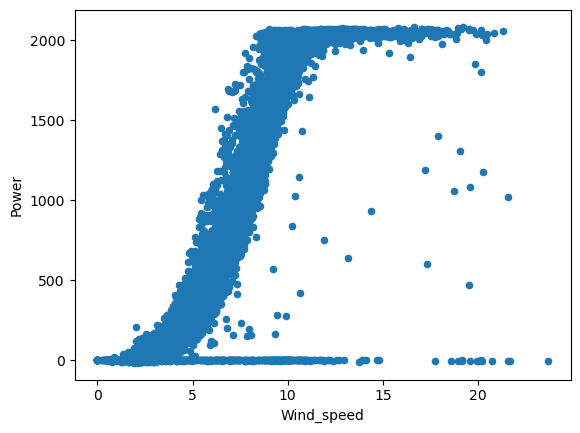

In [59]:
# Plot data
%matplotlib inline
plot_1 = df_2.plot("Wind_speed", "Power", kind="scatter")
#3plt.show() # not necessary in Jupyter Notebooks